In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

<b>Define scaled SIR model:</b>

In [2]:
count = 0
covidDataJun7 = pd.read_csv("C:\\Users\\tomas\\Downloads\\national-history - Jun7th.csv")
covidData = pd.read_csv("C:\\Users\\tomas\\Downloads\\national-history.csv")
dailyDeathsJun7 =[]
dailyDeaths = []
for i in range(len(covidDataJun7['date'])):
    dailyDeathsJun7.append(covidDataJun7['deathIncrease'][len(covidDataJun7['date'])-i-1])

for i in range(len(covidData['date'])):
    dailyDeaths.append(covidData['deathIncrease'][len(covidData['date'])-i-1])


In [3]:
def SEIRHD(x,t, beta, gamma,mu, gD, f_D, gamma_H, k, epsilon, beta_hat, delta_c,D_c):
    S, E, I, R, H, D = x
    dD = gamma_H * H
    #dD = f_D * gamma * I

    dS = -(beta * S * I)/((1+ (dD/delta_c)**k) + (D/D_c)**k)
    dE = ((beta * S * I)/((1+ (dD/delta_c)**k)+ (D/D_c)**k)) - (mu * E)
    
    dI = (mu * E) - (gamma * I)
    dR = (1-f_D) * gamma * I
    dH = (f_D * gamma * I) - (gamma_H * H)


    dxdt = [dS,dE, dI, dR, dH, dD]
    return dxdt


<b>Set parameter values:</b>

In [54]:
beta_hat = .5
f_D = .01
gamma = 1/6
gamma_H = 1/27
mu = 1/2
k = 2
delta_c = 2.5e-6
D_c = 4e-4


In [5]:
gD = 1
beta = .15
epsilon = 1/7



<b>Set initial conditions:</b>

In [21]:
S0 = 9999999/10_000_000
E0 = 1/10_000_000
I0 = 0.
R0 = 0.
H0 = 0.
D0 = 0.
B0 = beta

x0 = [S0,E0,I0,R0, H0, D0]

<b>Time span for solving the ODE:</b>

In [7]:
tmax = 420
nt = 10*tmax
t = np.linspace(0, tmax, tmax)

<b>Compute numerical solution to the ODE:</b>

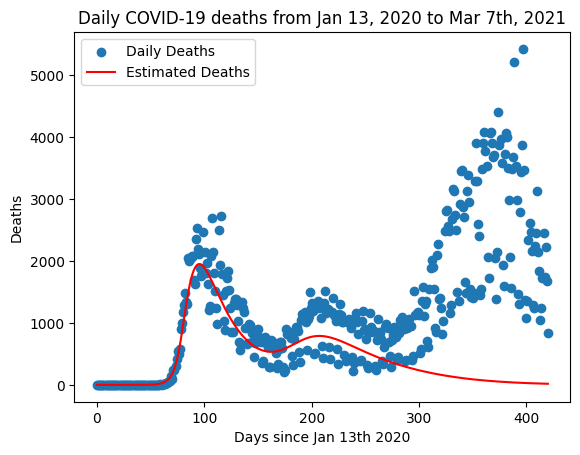

In [58]:
deaths_per_day = np.zeros(15)
deaths_per_day = deaths_per_day.tolist()
xout = odeint(SEIRHD, x0, t, args=(beta_hat, gamma,mu,gD, f_D, gamma_H, k, epsilon, beta, delta_c,D_c))
for i in range(len(t)-1):
    deaths_per_day.append((xout[i+1,-1] - xout[i,-1]) * 300_000_000)

plt.scatter(t,dailyDeaths, label = 'Daily Deaths')


plt.plot(t,deaths_per_day[0:420], 'r', label = 'Estimated Deaths')

plt.xlabel ('Days since Jan 13th 2020')
plt.ylabel ('Deaths')
plt.title ('Daily COVID-19 deaths from Jan 13, 2020 to Mar 7th, 2021')
plt.legend()

plt.show()

<b>Plot solution trajectories:</b>

In [218]:
print(xout[:,-1])
print(deaths_per_day)


[0.00000000e+00 6.30627135e-13 3.81017104e-12 1.15760625e-11
 2.51315095e-11 4.51615898e-11 7.25538981e-11 1.08360494e-10
 1.53721131e-10 2.09953791e-10 2.78997286e-10 3.62077776e-10
 4.61721832e-10 5.79844074e-10 7.19450620e-10 8.86902771e-10
 1.08573061e-09 1.31593413e-09 1.58047977e-09 1.89554973e-09
 2.26358850e-09 2.68459607e-09 3.16801137e-09 3.73092882e-09
 4.38334176e-09 5.13904729e-09 6.01339078e-09 7.02582132e-09
 8.19601957e-09 9.54997719e-09 1.11141534e-08 1.29272047e-08
 1.50240912e-08 1.74424947e-08 2.02442899e-08 2.34827569e-08
 2.72142431e-08 3.15289771e-08 3.65145850e-08 4.22759176e-08
 4.89343542e-08 5.66237362e-08 6.55036747e-08 7.57690542e-08
 8.76308189e-08 1.01336943e-07 1.17175749e-07 1.35463047e-07
 1.56585969e-07 1.80980862e-07 2.09162022e-07 2.41720791e-07
 2.79334247e-07 3.22792345e-07 3.72987701e-07 4.30976889e-07
 4.97956205e-07 5.75334168e-07 6.64707943e-07 7.67954012e-07
 8.87202767e-07 1.02493781e-06 1.18402336e-06 1.36777194e-06
 1.57998401e-06 1.825057